# Forward models: the gentlest(?) introduction

Oh, is this Joanmarie trying to teach a multi-week concept in a grad-level math modeling class at Penn State taught by [Richard Alley](https://en.wikipedia.org/wiki/Richard_Alley) in a class formulated by the people who wrote the ["New Testament of geoscience modeling"](https://press.princeton.edu/books/paperback/9780691145143/mathematical-modeling-of-earths-dynamical-systems?srsltid=AfmBOormuecRHM6CDKLfYHT5u2vGRxKmrBJz6M5fk0I9CrGtAg3VB7x3)? It is, so it's OK if this part feels like a lot, because it is. I'd prefer to lecture on this first before you tried to write your own code, but this class is flipped, so I'll do my best (but I also think you got this!!)

# Why??

I'm going to show you how to solve a diffusion model explicitly because (1) conceptually I think it's super easy and (2) so many things in the Earth system can be represented by the diffusion equation. The CliffNotes verion of how/why the forward in time, centered in space (FTCS) scheme works is that, at every timestep, you go through your model domain and basically <i>find the average value of your quantity (heat, water, sediment) on either side of your current node</i>, and <i>do that over and over again until it stops changing</i>. In this system the flow of information acts just like the flow of matter or energy that you're modeling, which is why I think (hope?) it is conceptually one of the easier ways to be introduced to modeling (no Jacobians for you yet, young padawan).

# OK??

The following lesson is derived from the [FTCS scheme](https://primer-computational-mathematics.github.io/book/c_mathematics/numerical_methods/7_FTCS.html) lesson from the [Department of Earth Science and Engineering, Imperial College London’s Primer on Programming in Python and Mathematical/Computational Techniques for Scientists and Engineers](primer-computational-mathematics.github.io). Read that article and click on the links. If you'd like a more in-depth explainer you can read Slingerland and Kump Chapter 2. I also found this nice [YouTube video](https://www.youtube.com/watch?v=ToIXSwZ1pJU) for how to solve the heat equation analytically. 

In [89]:
import numpy as np
import matplotlib.pyplot as plt


# Setup

In [90]:
n = 101

T_old = np.zeros(n)*100
T_new = np.zeros(n)*100

for i in range(1,n):
    T_old[i] = 100.
    T_new[i] = 100.


T_old[0] = 626
T_new[0] = 626

l = 5000
dx = l/(n-1)
x = np.linspace(0,l,n)
print("dx = %.2f" % dx)


dx = 50.00


In your own words, explain what is happening in the above code. 

<i>Your text here</i>

In [91]:
# What is k?
k = 3.0

dt_max = dx**2/(2*k)
dt = 0.2 * dt_max

print("Maximum dt = %.8f." % dt_max)
print("Used dt = %.8f." % dt)

Maximum dt = 416.66666667.
Used dt = 83.33333333.


In your own words, explain what is happening in the above code. 

<i>Your text here</i>

# Run the model

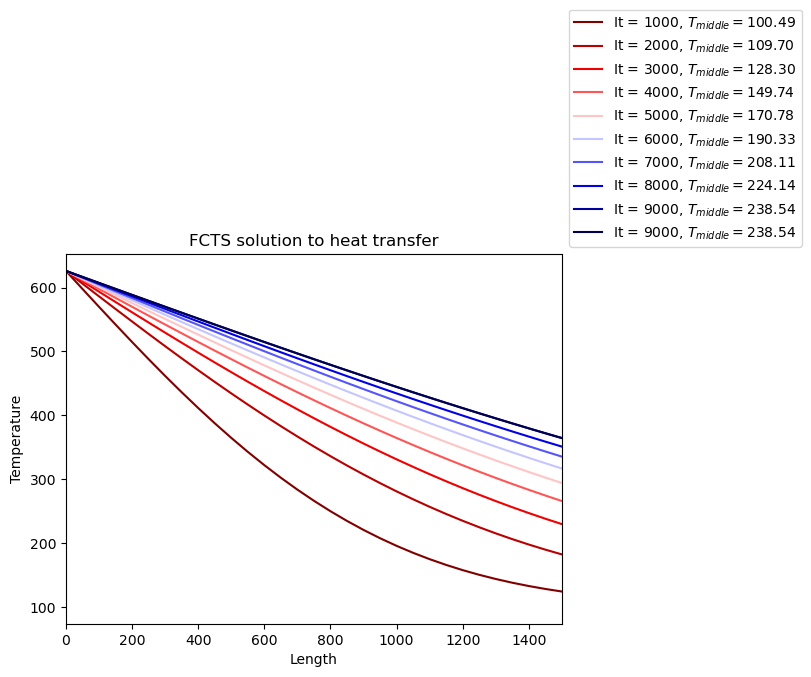

In [92]:
count = 0
count2 = 0
colors = plt.cm.seismic_r(np.linspace(0,1,10))

while T_old[int(n/2)]>50.0 and count2<9:
    
    # Step 1
    for i in range(0,n-1):
        T_new[i] = T_old[i]+dt*k*(T_old[i+1]-2*T_old[i]+T_old[i-1])/dx**2
        T_new[0] = 626
        T_new[100] = 100

    # Step 2    
    T_old = T_new
    count = count + 1
    
    if count%1000==0:
        
        plt.plot(x, T_new, color=colors[count2],
                 label="It = %g, $T_{middle}=%.2f$" % (count,T_old[int(n/2)]))
    
        count2 = count2 + 1

plt.plot(x, T_new, color=colors[count2],
         label="It = %g, $T_{middle}=%.2f$" % (count,T_old[int(n/2)]))
plt.title("FCTS solution to heat transfer")
plt.legend(bbox_to_anchor=[1,1])
plt.xlabel("Length")
plt.ylabel("Temperature")
plt.xlim(0,1500)
plt.show()

Now explain what happened in Step 1 and Step 2 individually. Why does the `while` loop end?

<i>Your text here</i>

# Break the model

Here's what happens if you choose a delta t larger than the one given by the CFL condition

dx = 0.01
Maximum dt = 0.0050.
Used dt = 0.0100.


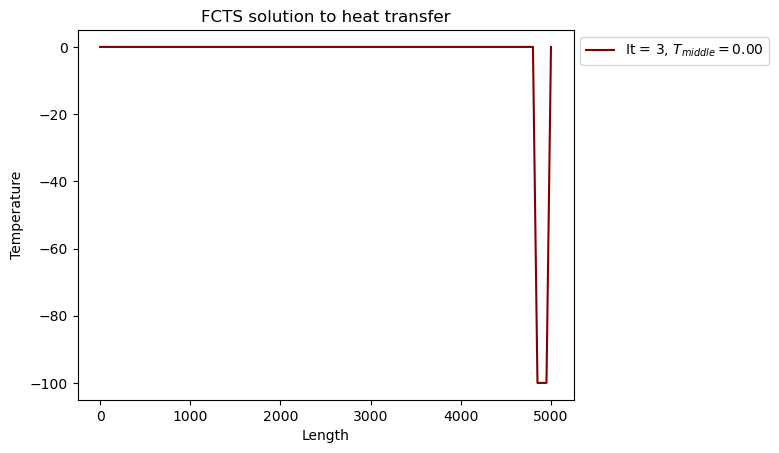

In [93]:
n = 101

T_old = np.zeros(n)
T_new = np.zeros(n)

for i in range(1,n-1):
    T_old[i] = 100.

l = 1
dx = l/(n-1)
print("dx = %.2f" % dx)

k = 0.01
dt_max = dx**2/(2*k)
dt = 2 * dt_max

print("Maximum dt = %.4f." % dt_max)
print("Used dt = %.4f." % dt)

count = 0
count2 = 0
colors = plt.cm.seismic_r(np.linspace(0,1,10))

while T_old[int(n/2)]>50.0:
    
    for i in range(1,n-1):
        T_new[i] = T_old[i]+dt*k*(T_old[i+1]-2*T_old[i]+T_old[i-1])/dx**2
        
    T_old = T_new
    count = count + 1
    
    if count%1000==0:
        
        plt.plot(x, T_new, color=colors[count2],
                 label="It = %g, $T_{middle}=%.2f$" % (count,T_old[int(n/2)]))
    
        count2 = count2 + 1

plt.plot(x, T_new, color=colors[count2],
         label="It = %g, $T_{middle}=%.2f$" % (count,T_old[int(n/2)]))
plt.title("FCTS solution to heat transfer")
plt.legend(bbox_to_anchor=[1,1])
plt.xlabel("Length")
plt.ylabel("Temperature")
plt.show()

Use your own words to describe what happened both <i>numerically</i> and <i>physically</i> (physical metaphor for the numerial instability)

<i>Your text here</i>